# Project: Wrangling and Analyzing Data
<a id='toc'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing data</a></li>
<li><a href="#analysing">Analysing and visualising data</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be wrangling, analyzing and visualizing the tweet archive of Twitter user **WeRateDogs**. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The ratings almost always have a denominator of 10, but the numerators can be greater than 10.

I will gather the data from three sources and in a variety of formats. The first source is a `csv` file, which I will read into a pandas DataFrame. Secondly, I will programmatically download the tweet `image predictions`, a `tsv` file that is hosted on Udacity's servers using the `Requests` library. Finally, I will query additional data from the Twitter API and read it into a pandas dataframe. 

After all the data gathering is done, I will assess the quality and tidiness the data, then clean it. I will document my wrangling efforts in this Jupyter notebook, and present them through analyses and visualizations using Python and its libraries.

In [1]:
# Import the packages used in this analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
from tweepy import OAuthHandler
import json
import requests
import os
%matplotlib inline

<a id='gathering'></a>
## Data Gathering
In the cells below, I gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read the 'twitter_archive_enhanced.csv' file into a pandas dataframe
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Downloading the 'image_predictions.tsv' file programmatically

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
# Read the 'image-predictions.tsv' file into a pandas dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# Reading the 'tweet_json.txt' file into a pandas dataframe line by line

tweet_json = pd.read_json('tweet_json.txt', lines=True)

<a id='assessing'></a>
## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issues**. I will use **both** visual assessment and programmatic assessement to assess the datasets.

In [5]:
# This statement displays the twitter archive, so as to perform a visual assessmnet of the dataset
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
# The 'info()' method is used to display a detailed assessment of the columns and their respective data types
# This also shows how many non-null values are in each column

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# Visual assessment of the image predictions dataset
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# This programmatic assessment shows that there are no missing values in this dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# Visually assessing the tweet json dataset

tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [10]:
# This programmatic assessment shows columns with a number of missing values, and will need to be dropped

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality issues
**Twitter Archive Table**
1. The dataset contains some rows that are retweets and replies; however, this project only focuses on original ratings that have images.
2. There are some observations that have decimal dog ratings.
3. The `name` column has invalid dog names: `a`, `an`, `the` and `none` for some name entries.
4. The `timestamp` column should be date data type.
5. Presence of outliers in the `rating numerator` column 
**Image Predictions Table**

6. There is a mixture of lowercase and uppercase values in the image prediction (`p1`, `p2` and `p3`) columns

**Tweet_json table**

7. There are too many missing values in multiple columns
8. There are two `tweet id` columns

### Tidiness issues
The following two tidiness issues are identified
1. The three datasets need to merged into one dataset

2. The columns `doggo`, `puppo`, `pupper`, and `floofer` need to be combined into a single column.

<a id='cleaning'></a>
## Cleaning Data
In this section, I will clean **all** the issues I documented while assessing. First, I will make a copy of the original data before cleaning, and then merge individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame.

The following shortened dataframe names shall be used in this process to represent the three datasets:

* **archive_df** is copy of `twitter_archive_enhanced`
* **img_df** is copy of `image_predictions`
* **json_df** is copy of `tweet_json.txt`

In [5]:
# Make copies of original pieces of data

archive_df = twitter_archive.copy()
img_df = image_predictions.copy()
json_df = tweet_json.copy()

### Issue #1: The `Twitter Archive` table contains some rows that are retweets and replies; however, this project only focuses on original ratings that have images.

#### Define: 
* Drop all observations that are retweets and/or replies, i.e., observations where the value of `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` or `'in_reply_to_status_id'` is **not null**. 
* Drop retweets using pandas' `drop` method by index.

#### Code

In [6]:
# This list contains the indexes of the rows that have retweets or replies
index_to_drop = (
    list(archive_df[archive_df['in_reply_to_status_id'].notnull()].index) + 
    list(archive_df[archive_df['retweeted_status_id'].notnull()].index)
)

# Drop the rows that contain retweets and/or replies
archive_df.drop(index=index_to_drop, inplace=True)

#### Test

In [7]:
# Use the info() method to check that the retweet and reply columns no longer contain non-null values
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: There are some observations that have decimal dog ratings.

#### Define:
- Use regular expression to identify the observations that have decimal dog ratings
- Drop these observations using the `drop` function by the index

#### Code:

In [8]:
# This code uses regular expressions on the 'text' column to identify the observations that have decimal dog ratings.
archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\hp-15\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [9]:
# These are the indexes of the observations with decimal ratings
decimal_index = archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].index

# Drop the observations with decimal index by index
archive_df.drop(index=decimal_index, inplace=True)

C:\Users\hp-15\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### Test:

In [10]:
# Rerun the following code to check if the observations with decimal ratings have been dropped
archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator


### Issue #3: The `name` column in the `Twitter Archive` table has invalid dog names: 'a', 'an', 'the' and 'none'

#### Define: 
The entries `'a', 'an', 'the' and 'None` for example are not valid dog names. All observations containing these entries will have to be dropped.
* Drop all observations that have invalid dog names using the `drop` function on the index

#### Code

In [11]:
# This code creates a mask for visible invalid name entries in the 'name' column
invalid_name_filter = (
    (archive_df['name'] == 'None') | 
    (archive_df['name'] == 'an') | 
    (archive_df['name'] == 'the') | 
    (archive_df['name'] == 'a') |
    (archive_df['name'] == 'quite') |
    (archive_df['name'] == 'all') |
    (archive_df['name'] == 'such')
)

# Drop the rows that contain invalid dog names
archive_df.drop(archive_df[invalid_name_filter].index, inplace=True)

Despite having dropped the invalid names that were visible during the visual assessment, I observed that most of the invalid names were common English words and were all lowercase words. As a result, I ran the code below to display all the invlid dog names in the `name` column of the `Twitter archive` table.

In [12]:
# This code generates a series of invalid dog names that are still present in the 'name' column.
# These observations will have to be dropped as well


archive_df['name'][archive_df['name'].str.islower()].value_counts()[:10] # Displaying the first 10

one             4
very            4
just            3
actually        2
getting         2
not             2
unacceptable    1
old             1
space           1
mad             1
Name: name, dtype: int64

In [13]:
# List of indexes with more invalid names
invalid_names_index = archive_df['name'][archive_df['name'].str.islower()].index

# Drop the other identified invalid names
archive_df.drop(index=invalid_names_index, inplace=True)

#### Test

In [14]:
# This visual assessment shows that the identified invalid dog names have been dropped from the dataframe
archive_df['name'][archive_df['name'].str.islower()].value_counts()

Series([], Name: name, dtype: int64)

A sample of the `first 15` and the `last 15` dog names is selected just to check the validity of the remaining dog names.

In [15]:
# The first 15 dog names
archive_df['name'].head(15)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
6          Jax
8         Zoey
9       Cassie
10        Koda
11       Bruno
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
Name: name, dtype: object

In [16]:
# The last 15 dog names
archive_df['name'].tail(15)

2295          Gabe
2296         Clybe
2297          Dave
2300          Keet
2302        Klevin
2303         Carll
2308          Jeph
2309       Jockson
2312         Josep
2313         Lugan
2315    Christoper
2317       Jimothy
2318      Kreggory
2319         Scout
2325        Walter
Name: name, dtype: object

### Issue #4: The `timestamp` column should be `datetime` data type and not `object` type.

#### Define:
 * Convert the data type of the `timestamp` column to `datetime` data type using pandas' `datetime` method 

#### Code

In [17]:
# The code statement below converts the data type of 'timestamp' column to 'datetime'
archive_df['timestamp']= pd.to_datetime(archive_df['timestamp'])

#### Test

In [18]:
# This test confirms that the data type of the timestamp column has been converted to 'datetime64'
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2325
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1387 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1387 non-null   datetime64[ns, UTC]
 4   source                      1387 non-null   object             
 5   text                        1387 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1387 non-null   object             
 10  rating_numerator            1387 non-null   int64           

### Issue #5: Presence of outliers in the `rating_numerator` column

#### Define:
- Use descriptive statistics to detect presence of outliers in the `rating_numerator` column
- Drop all observations that are outliers

#### Code

In [19]:
# Use pandas' describe() method to generate descriptive statistics

archive_df.rating_numerator.describe()

count    1387.000000
mean       12.041817
std        47.449400
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

From the descriptive statistics generated above, I observed that the mean rating numerator is 12, the minimumun is 2, and the maximum rating numerator is 1776. However, looking at the difference between the average rating numerator and the maximum rating numerator, it is highly likely that outliers are present in this variable. Therefore, I checked for the presence of outliers using the interquartile range method as shown in the code cell below.

#### Detecting Outliers Using Interquartile Range

>The interquartile range method defines outliers as values larger than the upper bound (i.e., Q3 + 1.5 * IQR) or the values smaller than the lower bound (i.e., Q1 – 1.5 * IQR), where
>* Q3 = the upper quartile
>* Q1 = the lower quartile
>* IQR = the interquartile range (i.e, Q3 - Q1)

In [20]:
# Compute the interquartile range (iqr) as follows:

lower_quart = round(archive_df['rating_numerator'].quantile(.25)) # lower quartile
upper_quart = round(archive_df['rating_numerator'].quantile(.75)) # upper quartile
iqr = upper_quart - lower_quart # interquartile range

In [21]:
# Compute the upper and lower bounds as follows:

lower_bound = round(lower_quart - (1.5 * iqr))
upper_bound = round(upper_quart + (1.5 * iqr))

print(f"Lower bound: {lower_bound}\nUpper bound: {upper_bound}")

Lower bound: 7
Upper bound: 15


In [22]:
# Drop observations that have rating numerators that are less than 7 or greater than 15
outliers = (archive_df['rating_numerator'] < 7) | (archive_df['rating_numerator'] > 15)

archive_df.drop(archive_df[outliers].index, inplace=True)

#### Test

In [23]:
# Generate descriptive statistics to check that outliers have been removed
archive_df['rating_numerator'].describe()

count    1336.000000
mean       10.949850
std         1.516363
min         7.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

### Issue #6: There are a mixture of both lowercase and uppercase values in `p1, p2 and p3` columns of the image predictions table

#### Define:
- Convert all values in `p1, p2, p3` columns to lowercase

#### Code:

In [24]:
# Convert all values in the p1, p2 and p3 columns to lowercase
cols = ['p1', 'p2', 'p3']

for col in cols:
    img_df[col] = img_df[col].str.lower().replace('_', ' ', regex=True)

#### Test

In [25]:
# Code checks that only lowercase values are present in the 'p1' column. 
# If the same code is run on the 'p2' and 'p3' columns, it yields the same result
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #7: There are too many missing values in multiple columns of the `Tweet_json`

#### Define:
- Drop all columns that have missing values.

#### Code

In [26]:
# This code drops all columns that have null values from the tweet_json table
json_df.dropna(axis='columns', inplace=True)

#### Test

In [27]:
# This code statement confirms that all null values have been dropped
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   id                  2354 non-null   int64              
 2   id_str              2354 non-null   int64              
 3   full_text           2354 non-null   object             
 4   truncated           2354 non-null   bool               
 5   display_text_range  2354 non-null   object             
 6   entities            2354 non-null   object             
 7   source              2354 non-null   object             
 8   user                2354 non-null   object             
 9   is_quote_status     2354 non-null   bool               
 10  retweet_count       2354 non-null   int64              
 11  favorite_count      2354 non-null   int64              
 12  favorited           2354 non-null 

### Issue #8:  There are two `tweet id` columns in the Tweet_json Table

#### Define:
- Drop the `id_str` column, as there is not need to have two tweet ID's

#### Code

In [28]:
# Drop the 'id_str' column from the tweet_json table
json_df.drop(columns=['id_str'], inplace=True)

#### Test

In [29]:
# This code checks that one o the 'id_str' columns has been dropped
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   id                  2354 non-null   int64              
 2   full_text           2354 non-null   object             
 3   truncated           2354 non-null   bool               
 4   display_text_range  2354 non-null   object             
 5   entities            2354 non-null   object             
 6   source              2354 non-null   object             
 7   user                2354 non-null   object             
 8   is_quote_status     2354 non-null   bool               
 9   retweet_count       2354 non-null   int64              
 10  favorite_count      2354 non-null   int64              
 11  favorited           2354 non-null   bool               
 12  retweeted           2354 non-null 

### Tidiness Issue #1: The three datasets need to merged into one dataset

#### Define:
Before analysing and visualising can be conducted, the three datasets have to be merged into one dataset. After merging the datasets, all columns that will not be used in the analysis will be dropped.
- Rename the `id` column in the `tweet_json` table to `tweet_id` to merge the three datasets
- Drop duplicated columns
- Rename columns that were duplicated

#### Code:

In [30]:
# Rename the 'id' column of the 'tweet_json' table to 'tweet_id' so as to merge the three datasets on this column
json_df.rename(columns={'id': 'tweet_id'}, inplace=True)


# Merge the three tables using the merge funciton 
master_dataset = archive_df.merge(json_df, on='tweet_id').merge(img_df, on='tweet_id')

In [31]:
# The master_dataset before dropping columns 
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1294
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1295 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1295 non-null   datetime64[ns, UTC]
 4   source_x                    1295 non-null   object             
 5   text                        1295 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1295 non-null   object             
 10  rating_numerator            1295 non-null   int64           

#### Drop extra columns

In [32]:
# The following columns will be dropped from the master_dataset
columns_to_drop = [
    'in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',
    'expanded_urls',
    'created_at',
    'full_text',
    'favorited',
    'retweeted',
    'source_y',
    'user',
    'truncated',
    'display_text_range',
    'entities',
    'expanded_urls',
    'is_quote_status',
    'retweeted'
]

# Drop columns from the master_dataset
master_dataset.drop(columns=columns_to_drop, inplace=True)

In [33]:
# Rename 'source_x' to 'source'
master_dataset.rename(columns={'source_x': 'source'}, inplace=True)

#### Test:

In [34]:
# The structure of the master_dataset now looks as shown below
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1294
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1295 non-null   int64              
 1   timestamp           1295 non-null   datetime64[ns, UTC]
 2   source              1295 non-null   object             
 3   text                1295 non-null   object             
 4   rating_numerator    1295 non-null   int64              
 5   rating_denominator  1295 non-null   int64              
 6   name                1295 non-null   object             
 7   doggo               1295 non-null   object             
 8   floofer             1295 non-null   object             
 9   pupper              1295 non-null   object             
 10  puppo               1295 non-null   object             
 11  retweet_count       1295 non-null   int64              
 12  favorite_count      1295 non-null 

### Tidiness Issue #2: The columns `doggo`, `puppo`, `pupper`, and `floofer` need to be combined into a single column.

#### Define:
- Create a new column called `dog_stage` in the `master_dataset`
- For every entry in `doggo`, `puppo`, `pupper` or `flooter` columns that do not contain `None` as an entry, enter that value in the respective cell of the `dog_stage` column. Otherwise, enter `None`.
- Once this process is completed, drop the columns `doggo`, `puppo`, `pupper` and `floofer`

#### Code

In [59]:
# This is the list of dog stages that need to be combined into a single column
dog_stages = ['doggo', 'puppo', 'pupper', 'floofer']

# Create the 'dog_stage' column that combines the four columns
master_dataset['dog_stage'] = 'None'

for stage in dog_stages:
    dog_stage_index = master_dataset[stage][master_dataset[stage] == stage].index
    master_dataset.loc[dog_stage_index, 'dog_stage'] = stage
    
# Drop the dog stages columns
master_dataset.drop(columns=dog_stages, inplace=True)

#### Test

In [64]:
# Check that the dog stage columns have been dropped
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1294
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1295 non-null   int64              
 1   timestamp           1295 non-null   datetime64[ns, UTC]
 2   source              1295 non-null   object             
 3   text                1295 non-null   object             
 4   rating_numerator    1295 non-null   int64              
 5   rating_denominator  1295 non-null   int64              
 6   name                1295 non-null   object             
 7   retweet_count       1295 non-null   int64              
 8   favorite_count      1295 non-null   int64              
 9   lang                1295 non-null   object             
 10  jpg_url             1295 non-null   object             
 11  img_num             1295 non-null   int64              
 12  p1                  1295 non-null 

In [63]:
# Check the values contained in the 'dog_stage' column
master_dataset.dog_stage.value_counts()

None       1121
pupper      118
doggo        36
puppo        15
floofer       5
Name: dog_stage, dtype: int64

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
# Save the master_dataset to a CSV file 'twitter_archive_master.csv'
master_dataset.to_csv('twitter_archive_master.csv', index=False)

<a id='analysing'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [78]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1295 non-null   int64  
 1   timestamp           1295 non-null   object 
 2   source              1295 non-null   object 
 3   text                1295 non-null   object 
 4   rating_numerator    1295 non-null   int64  
 5   rating_denominator  1295 non-null   int64  
 6   name                1295 non-null   object 
 7   retweet_count       1295 non-null   int64  
 8   favorite_count      1295 non-null   int64  
 9   lang                1295 non-null   object 
 10  jpg_url             1295 non-null   object 
 11  img_num             1295 non-null   int64  
 12  p1                  1295 non-null   object 
 13  p1_conf             1295 non-null   float64
 14  p1_dog              1295 non-null   bool   
 15  p2                  1295 non-null   object 
 16  p2_con

#### Is there a common dog name?

In [73]:
# The code below checks for the most common dog name from the dataset,
# and it shows that 'Charlie' is the most common dog name.
master_df[['name']].value_counts()[:5]

name   
Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
dtype: int64

#### Checking for Correlation between `rating_numerator`, `favorite_count` and `retweet_count`

In [68]:
# This code statement checks for the correlation between favourite count, retweet count and the rating numberator.
master_df[['rating_numerator', 'favorite_count', 'retweet_count']].corr()

,rating_numerator,favorite_count,retweet_count
rating_numerator,1.000000,0.518945,0.395684
favorite_count,0.518945,1.000000,0.921678
retweet_count,0.395684,0.921678,1.000000


#### Image Prediction Accuracy
The code statements below check for the algorithm's prediction accuracy. The `golden_retriever` is used as an example.

In [76]:
# This code prints out the results of the first image prediction, displaying only the top five observations
master_df[['p1']].value_counts()[:5]

p1                
golden retriever      90
labrador retriever    64
pembroke              63
chihuahua             58
pug                   38
dtype: int64

In [74]:
# This code prints out the results of the second image predictions.
master_df[['p2']].value_counts()[:5]

p2                      
labrador retriever          64
golden retriever            60
cardigan                    53
french bulldog              28
chesapeake bay retriever    27
dtype: int64

In [75]:
# This code prints the results of the third image prediction.
master_df[['p3']].value_counts()[:5]

p3                
labrador retriever    55
chihuahua             36
kelpie                28
golden retriever      28
chow                  23
dtype: int64

### Insights:
1. The most common dog name is `'Charlie'`
2. The algorithm's level of confidence was higher in it's first image prediction than in the second and third predictions
3. There is a correlation between the `'favorite_count'` and the `'retweet_count'`

### Visualization
The heatmap below shows the correlation as among the `rating_numerator`, `favourite_count` and `retweet_count`

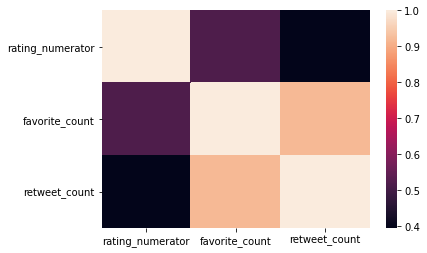

In [77]:
# This code creates a heatmap

sns.heatmap(master_df[['rating_numerator', 'favorite_count', 'retweet_count']].corr());

From the heatmap above, the orange shades between `favourite_count` and `retweet_count`confirm that there is a high correlation between the two variables.